In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
current_path = '/content/drive/MyDrive/Year 4 (2022 - 2023)/Fall 2022/Computational Social Science/Project/New processed data'

In [7]:
impurity_index_df = pd.read_csv(current_path + '/impurity_index.csv')

In [8]:
# Create a dict to store impurity index for each movie
impurity_dict = {}
for index, row in impurity_index_df.iterrows():
    impurity_dict[row['tconst']] = row['Impurity Index']
len(impurity_dict)

3540

In [9]:
movies_df = pd.read_csv(current_path + '/movies_cast_2.csv')
movies_df

,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,tmdb_id,og_language,budget,revenue,ratio,ROI,averageRating,numVotes,Unnamed: 18,nconst
0,7363,tt1179904,movie,Paranormal Activity,Paranormal Activity,0,2007,NaN,86,"Horror,Mystery",23827,en,230000,194183034,0.001184,844.274061,6.3,238846,Info says budget is $15k,"['nm2209370', 'nm2913790', 'nm2104166', 'nm291..."
1,4907,tt2309260,movie,The Gallows,The Gallows,0,2015,NaN,81,"Horror,Mystery,Thriller",299245,en,100000,42664410,0.002344,426.644100,4.2,20611,NaN,"['nm3790547', 'nm6018502', 'nm4090362', 'nm225..."
2,8453,tt0876294,movie,Zombie Diaries,The Zombie Diaries,0,2006,NaN,85,"Horror,Sci-Fi",25035,en,9300,2000000,0.004650,215.053763,4.0,4755,NaN,"['nm0014714', 'nm2428131', 'nm2408572', 'nm028..."
3,9342,tt0907657,movie,Once,Once,0,2007,NaN,86,"Drama,Music,Romance",5723,en,160000,20710513,0.007726,129.440706,7.8,116662,NaN,"['nm0360598', 'nm2461627', 'nm2008013', 'nm247..."
4,2405,tt0374900,movie,Napoleon Dynamite,Napoleon Dynamite,0,2004,NaN,96,Comedy,8193,en,400000,46118097,0.008673,115.295243,6.9,218880,NaN,"['nm1417647', 'nm0708293', 'nm0340973', 'nm108..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3535,10702,tt1935194,movie,Overdrive,Overdrive,0,2017,NaN,93,"Action,Adventure,Crime",404733,en,28210303,7793,3619.954190,0.000276,5.3,14982,NaN,"['nm2207222', 'nm7188414', 'nm1869101', 'nm471..."
3536,414,tt1376213,movie,The Adventurer: The Curse of the Midas Box,The Adventurer: The Curse of the Midas Box,0,2013,NaN,100,"Adventure,Family,Fantasy",227707,en,25000000,6399,3906.860447,0.000256,5.4,6779,NaN,"['nm2902567', 'nm0790688', 'nm0372176', 'nm000..."
3537,9979,tt7869070,movie,The Fanatic,The Fanatic,0,2019,NaN,88,"Crime,Thriller",509853,en,18000000,3153,5708.848716,0.000175,4.2,11981,NaN,"['nm0000237', 'nm0001701', 'nm3132111', 'nm362..."
3538,3185,tt0254703,movie,The Point Men,The Point Men,0,2001,NaN,100,"Action,Drama",46943,en,6100000,714,8543.417367,0.000117,4.3,1161,NaN,"['nm0000483', 'nm0289098', 'nm0716490', 'nm053..."


In [10]:
# Create a new column to store impurity indices of movies
movies_df["impurity_index"] = ""

In [11]:
# Fill out the 'impurity_index' column with corresponding values for every movie
for index, row in movies_df.iterrows():
    movies_df.at[index,'impurity_index'] = impurity_dict[row['tconst']]

In [12]:
movies_df['genres_list'] = movies_df.genres.str[:].str.split(',').tolist()

In [13]:
# Add genres to set
genres_set = set()

for index, row in movies_df.iterrows():
#     print(row['genres_list'])
    for genre in row['genres_list']:
        genres_set.add(genre)

In [14]:
# Create a dictionary of movies
movies_dict = {}
for genre in genres_set:
    movies_dict[genre] = []

for index, row in movies_df.iterrows():
    # Add movie to its corresponding genre
    for genre in row['genres_list']:
        movies_dict[genre].append(row)

In [15]:
movies_df

,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,...,budget,revenue,ratio,ROI,averageRating,numVotes,Unnamed: 18,nconst,impurity_index,genres_list
0,7363,tt1179904,movie,Paranormal Activity,Paranormal Activity,0,2007,NaN,86,"Horror,Mystery",...,230000,194183034,0.001184,844.274061,6.3,238846,Info says budget is $15k,"['nm2209370', 'nm2913790', 'nm2104166', 'nm291...",0.625,"[Horror, Mystery]"
1,4907,tt2309260,movie,The Gallows,The Gallows,0,2015,NaN,81,"Horror,Mystery,Thriller",...,100000,42664410,0.002344,426.644100,4.2,20611,NaN,"['nm3790547', 'nm6018502', 'nm4090362', 'nm225...",0.375,"[Horror, Mystery, Thriller]"
2,8453,tt0876294,movie,Zombie Diaries,The Zombie Diaries,0,2006,NaN,85,"Horror,Sci-Fi",...,9300,2000000,0.004650,215.053763,4.0,4755,NaN,"['nm0014714', 'nm2428131', 'nm2408572', 'nm028...",0.5,"[Horror, Sci-Fi]"
3,9342,tt0907657,movie,Once,Once,0,2007,NaN,86,"Drama,Music,Romance",...,160000,20710513,0.007726,129.440706,7.8,116662,NaN,"['nm0360598', 'nm2461627', 'nm2008013', 'nm247...",0.625,"[Drama, Music, Romance]"
4,2405,tt0374900,movie,Napoleon Dynamite,Napoleon Dynamite,0,2004,NaN,96,Comedy,...,400000,46118097,0.008673,115.295243,6.9,218880,NaN,"['nm1417647', 'nm0708293', 'nm0340973', 'nm108...",0.625,[Comedy]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3535,10702,tt1935194,movie,Overdrive,Overdrive,0,2017,NaN,93,"Action,Adventure,Crime",...,28210303,7793,3619.954190,0.000276,5.3,14982,NaN,"['nm2207222', 'nm7188414', 'nm1869101', 'nm471...",0.375,"[Action, Adventure, Crime]"
3536,414,tt1376213,movie,The Adventurer: The Curse of the Midas Box,The Adventurer: The Curse of the Midas Box,0,2013,NaN,100,"Adventure,Family,Fantasy",...,25000000,6399,3906.860447,0.000256,5.4,6779,NaN,"['nm2902567', 'nm0790688', 'nm0372176', 'nm000...",0.375,"[Adventure, Family, Fantasy]"
3537,9979,tt7869070,movie,The Fanatic,The Fanatic,0,2019,NaN,88,"Crime,Thriller",...,18000000,3153,5708.848716,0.000175,4.2,11981,NaN,"['nm0000237', 'nm0001701', 'nm3132111', 'nm362...",0.375,"[Crime, Thriller]"
3538,3185,tt0254703,movie,The Point Men,The Point Men,0,2001,NaN,100,"Action,Drama",...,6100000,714,8543.417367,0.000117,4.3,1161,NaN,"['nm0000483', 'nm0289098', 'nm0716490', 'nm053...",0.375,"[Action, Drama]"


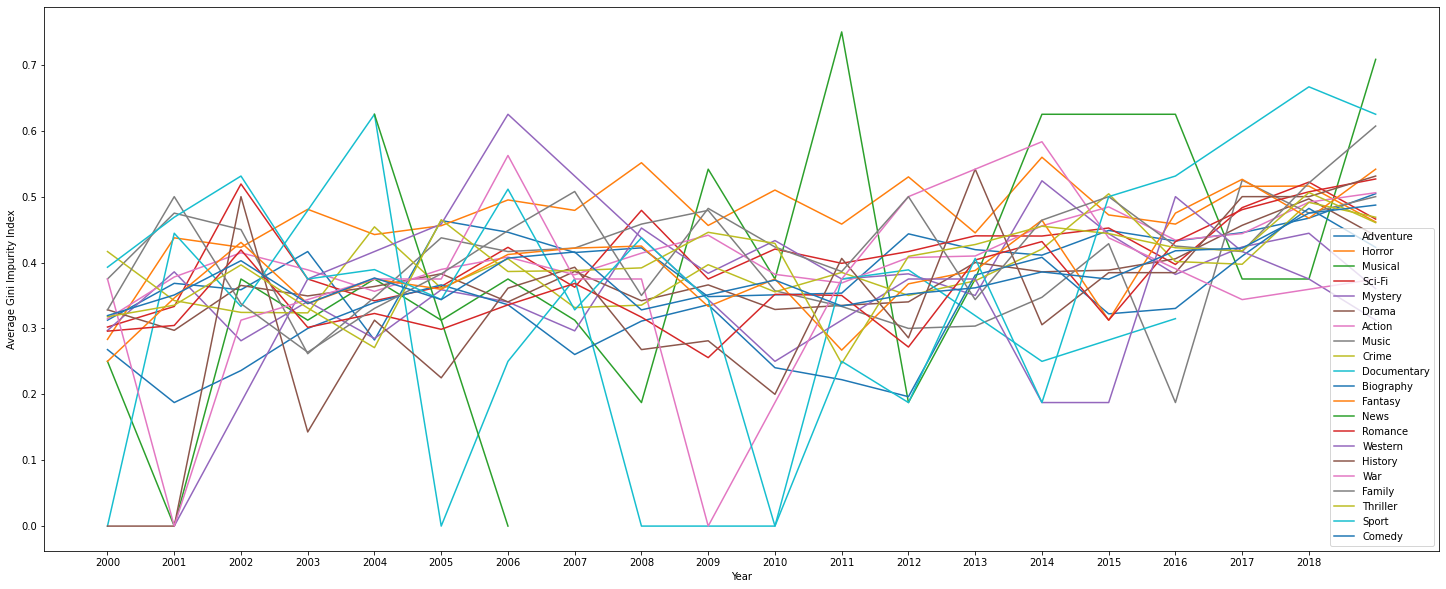

In [16]:
## Plot impurity index for 21 genres
# Function to generate Num votes plots by Genre 
i = 0
labels = []
plt.figure(figsize=(25,10)) 
for key, value in movies_dict.items():
    genre_list = value
    genre_df = pd.DataFrame(genre_list)

    # Group movies by year and calculate the mean values for all numerical columns
    start_year_df = genre_df.groupby(['startYear']).mean()

    # Plot Genre and Average budget by year

    line_plot = start_year_df['impurity_index'].plot.line()
#     title = 'Average Gini Impurity Index of ' + key + ' movies'
#     line_plot.set(title=title)
    labels.append(key)
    plt.xlabel('Year')
    plt.ylabel('Average Gini Impurity Index')
    plt.xticks(np.arange(2000, 2019, step=1))

    # Save fig
#     plots_path = current_path + '/movie_plots'
#     plt.savefig(plots_path + '/' + title + '.png')

plt.legend(labels)
plt.show()

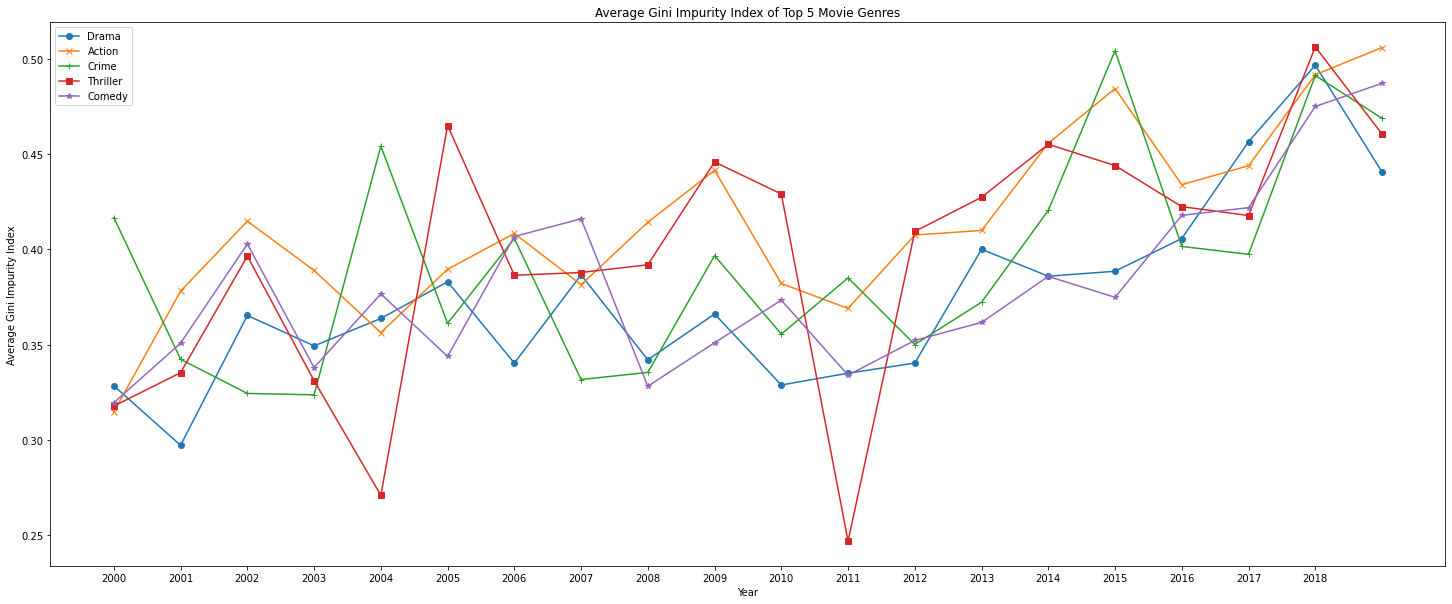

In [17]:
# Plot impurity index for top 5 genres
top_5_genres = set(['Drama','Comedy','Action','Crime','Thriller'])

i = 0
# mapping = {'j' : 'o', 'k': 'x', 'l': '+'}
mapping = ['o', 'x', '+', 's', '*']
labels = []
plt.figure(figsize=(25,10)) 
for key, value in movies_dict.items():
    if key in top_5_genres:
        genre_list = value
        genre_df = pd.DataFrame(genre_list)

        # Group movies by year and calculate the mean values for all numerical columns
        start_year_df = genre_df.groupby(['startYear']).mean()

        # Plot Genre and Average budget by year

        line_plot = start_year_df['impurity_index'].plot.line(marker=mapping[i])
    #     title = 'Average Gini Impurity Index of ' + key + ' movies'
    #     line_plot.set(title=title)
        labels.append(key)
        plt.xlabel('Year')
        plt.ylabel('Average Gini Impurity Index')
        plt.xticks(np.arange(2000, 2019, step=1))
        i += 1

        # Save fig
    #     plots_path = current_path + '/movie_plots'
    #     plt.savefig(plots_path + '/' + title + '.png')
plt.title('Average Gini Impurity Index of Top 5 Movie Genres')
plt.legend(labels)
plt.show()

## Plot homogenuity in terms of gender


In [18]:
actors_df = pd.read_csv(current_path + '/cast_proportion.csv')
actors_df

,tconst,actor,actress,actor_proportion,actress_proportion,actor_prop
0,tt0035423,3.0,1.0,0.75,0.25,higher
1,tt0118589,2.0,2.0,0.50,0.50,equal
2,tt0120467,4.0,0.0,1.00,0.00,higher
3,tt0120667,3.0,1.0,0.75,0.25,higher
4,tt0120679,2.0,2.0,0.50,0.50,equal
...,...,...,...,...,...,...
3535,tt8772262,3.0,1.0,0.75,0.25,higher
3536,tt8946378,2.0,2.0,0.50,0.50,equal
3537,tt9134216,4.0,0.0,1.00,0.00,higher
3538,tt9285882,3.0,1.0,0.75,0.25,higher


In [25]:
actors_df[(actors_df.actress == 0)]

,tconst,actor,actress,actor_proportion,actress_proportion,actor_prop,is_gender_homogeneous,is_only_males,is_only_females
2,tt0120467,4.0,0.0,1.0,0.0,higher,gender_homogeneous,males only,not only females
6,tt0120737,4.0,0.0,1.0,0.0,higher,gender_homogeneous,males only,not only females
18,tt0132245,4.0,0.0,1.0,0.0,higher,gender_homogeneous,males only,not only females
24,tt0139654,4.0,0.0,1.0,0.0,higher,gender_homogeneous,males only,not only females
26,tt0141926,4.0,0.0,1.0,0.0,higher,gender_homogeneous,males only,not only females
...,...,...,...,...,...,...,...,...,...
3514,tt7959026,4.0,0.0,1.0,0.0,higher,gender_homogeneous,males only,not only females
3521,tt8151874,4.0,0.0,1.0,0.0,higher,gender_homogeneous,males only,not only females
3523,tt8266310,4.0,0.0,1.0,0.0,higher,gender_homogeneous,males only,not only females
3528,tt8579674,4.0,0.0,1.0,0.0,higher,gender_homogeneous,males only,not only females


In [19]:
### Only males vs the rest
### Either only males OR only females vs Mix of males AND females

# Case 1: Gender homogeneous (All males OR ALL females vs. Mix of gender)
actors_df['is_gender_homogeneous'] = 'gender_heterogeneous'
actors_df.loc[actors_df['actor_proportion'] == 1.00, 'is_gender_homogeneous'] = "gender_homogeneous"
actors_df.loc[actors_df['actress_proportion'] == 1.00, 'is_gender_homogeneous'] = "gender_homogeneous"

actors_df['is_only_males'] = 'not only males'
actors_df.loc[actors_df['actor_proportion'] == 1.00, 'is_only_males'] = "males only"

actors_df['is_only_females'] = 'not only females'
actors_df.loc[actors_df['actress_proportion'] == 1.00, 'is_only_females'] = "females only"

In [20]:
# Merge Movies df (has revenues) with Actors df (has gender homogeneous)
movies_actors_df = movies_df.merge(actors_df, on='tconst', how='inner')

In [34]:
movies_actors_df.head(2)

,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,...,impurity_index,genres_list,actor,actress,actor_proportion,actress_proportion,actor_prop,is_gender_homogeneous,is_only_males,is_only_females
0,7363,tt1179904,movie,Paranormal Activity,Paranormal Activity,0,2007,NaN,86,"Horror,Mystery",...,0.625,"[Horror, Mystery]",2.0,2.0,0.5,0.5,equal,gender_heterogeneous,not only males,not only females
1,4907,tt2309260,movie,The Gallows,The Gallows,0,2015,NaN,81,"Horror,Mystery,Thriller",...,0.375,"[Horror, Mystery, Thriller]",2.0,2.0,0.5,0.5,equal,gender_heterogeneous,not only males,not only females


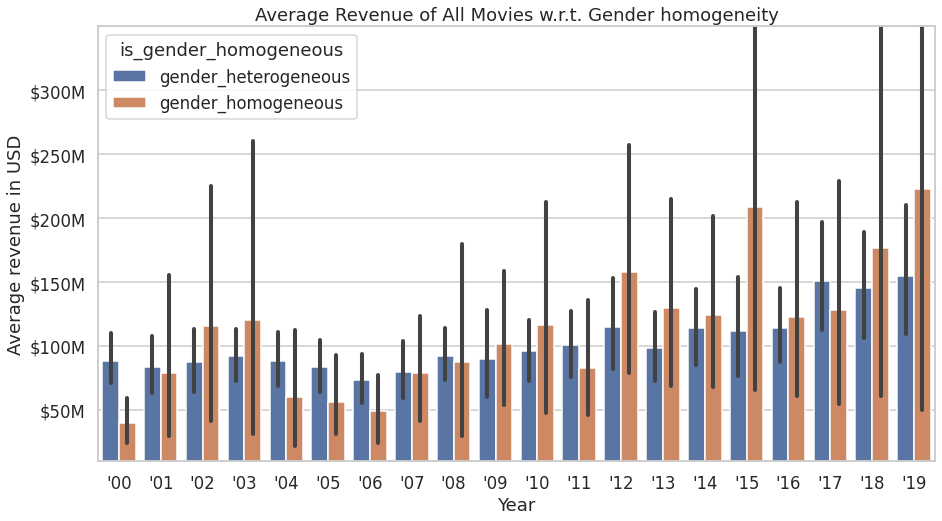

In [35]:
############################
years = np.arange(2000, 2020, 1)
year_labels = ["'" + str(y)[2:] for y in years]
year_labels_dict = dict(zip(years, year_labels))

top_5_genres = set(['Drama','Comedy','Action','Crime','Thriller'])


new_df = movies_actors_df.groupby(['startYear', 'is_gender_homogeneous']).agg(average_revenue=("revenue", 'mean'))
new_df = new_df.reset_index()

# plot barplot
# plt.figure(figsize=(25,10))
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_theme('talk')

sns.set_style('whitegrid')
colors = sns.color_palette("Set2",n_colors=3)
# cmap1 = LinearSegmentedColormap.from_list("my_colormap",colors)

barplot = sns.barplot(data=movies_actors_df, x='startYear', y='revenue', hue='is_gender_homogeneous')

# barplot = sns.barplot(x="startYear",
#            y="average_revenue",
#            hue="is_gender_homogeneous",
#            data=new_df,
#             palette=colors)
            # errorbar=('ci',0.95))
barplot.set(xlabel='Year', ylabel='Average revenue in USD')
barplot.set(title = 'Average Revenue of All Movies w.r.t. Gender homogeneity')
barplot.set_yticklabels(["$0M","$50M","$100M","$150M","$200M","$250M",'$300M','$350M'])
barplot.set_yticks(range(0, 350000000,50000000))

barplot.set_ylim(10000000, 350000000)


barplot.set_xticklabels(year_labels)

# barplot.set_ylim(10000000, 250000000)
plt.show()

############################

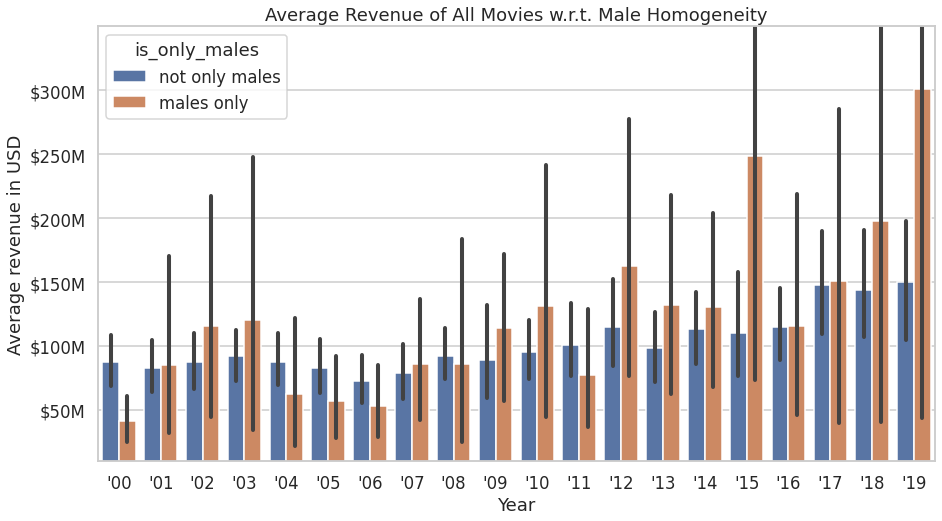

In [36]:
### Case 2: Only Males vs. Mix of gender OR Only Females
years = np.arange(2000, 2020, 1)
year_labels = ["'" + str(y)[2:] for y in years]
year_labels_dict = dict(zip(years, year_labels))

top_5_genres = set(['Drama','Comedy','Action','Crime','Thriller'])


new_df = movies_actors_df.groupby(['startYear', 'is_only_males']).agg(average_revenue=("revenue", 'mean'))
new_df = new_df.reset_index()

# plot barplot
# plt.figure(figsize=(25,10))
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_theme('talk')

sns.set_style('whitegrid')
colors = sns.color_palette("Set2",n_colors=3)

barplot = sns.barplot(data=movies_actors_df, x='startYear', y='revenue', hue='is_only_males')
# barplot = sns.barplot(x="startYear",
#            y="average_revenue",
#            hue="is_only_males",
#            data=new_df,
#             palette=colors,
#             errorbar=('ci', 95))

barplot.set(xlabel='Year', ylabel='Average revenue in USD')
barplot.set(title = 'Average Revenue of All Movies w.r.t. Male Homogeneity')
barplot.set_yticklabels(["$0M","$50M","$100M","$150M","$200M","$250M",'$300M','$350M'])
barplot.set_yticks(range(0, 350000000,50000000))

barplot.set_ylim(10000000, 350000000)


barplot.set_xticklabels(year_labels)

# barplot.set_ylim(10000000, 350000000)
plt.show()




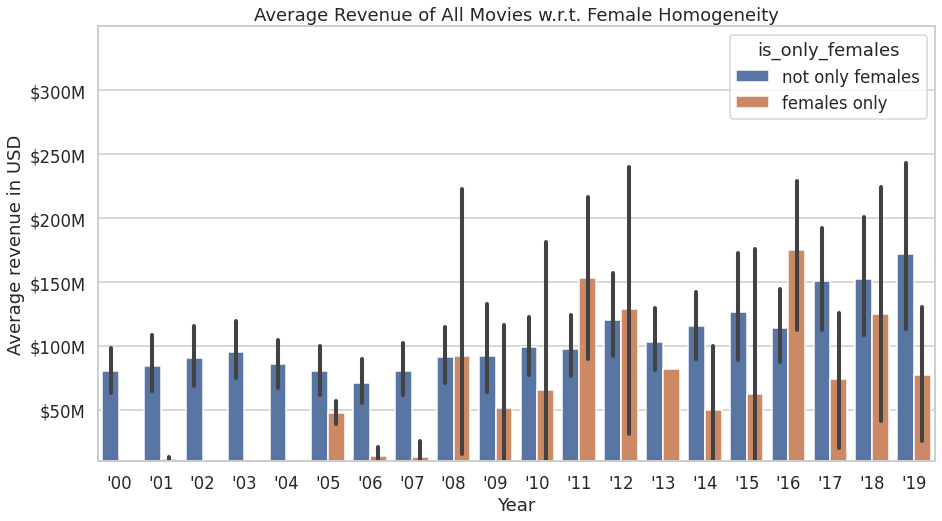

In [37]:
### Case 3: Only Feales vs. Mix of gender OR Only Males
years = np.arange(2000, 2020, 1)
year_labels = ["'" + str(y)[2:] for y in years]
year_labels_dict = dict(zip(years, year_labels))

top_5_genres = set(['Drama','Comedy','Action','Crime','Thriller'])


new_df = movies_actors_df.groupby(['startYear', 'is_only_females']).agg(average_revenue=("revenue", 'mean'))
new_df = new_df.reset_index()

# plot barplot
# plt.figure(figsize=(25,10))
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_theme('talk')

sns.set_style('whitegrid')
colors = sns.color_palette("Set2",n_colors=3)

barplot = sns.barplot(data=movies_actors_df, x='startYear', y='revenue', hue='is_only_females')
# barplot = sns.barplot(x="startYear",
#            y="average_revenue",
#            hue="is_only_females",
#            data=new_df,
#             palette=colors,
#             errorbar=('ci', 95))

barplot.set(xlabel='Year', ylabel='Average revenue in USD')
barplot.set(title = 'Average Revenue of All Movies w.r.t. Female Homogeneity')
barplot.set_yticklabels(["$0M","$50M","$100M","$150M","$200M","$250M",'$300M','$350M'])
barplot.set_yticks(range(0, 350000000,50000000))

barplot.set_ylim(10000000, 350000000)


barplot.set_xticklabels(year_labels)

# barplot.set_ylim(10000000, 350000000)
plt.show()




## Gini impurity index Zero vs Gini impurity index Non-zero

In [38]:
impurity_index_df = pd.read_csv(current_path + '/impurity_index.csv')

impurity_index_df

,tconst,HL+M,HL+O,NL+M,NL+O,a,b,i,l,w,Total PC,Impurity Index
0,tt0035423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.000
1,tt0118589,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,0.750
2,tt0120467,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0.375
3,tt0120667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,4.0,0.375
4,tt0120679,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,4.0,0.625
...,...,...,...,...,...,...,...,...,...,...,...,...
3535,tt8772262,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,4.0,0.375
3536,tt8946378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.000
3537,tt9134216,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,4.0,0.625
3538,tt9285882,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,4.0,0.625


In [39]:
impurity_index_df['is_ethnically_homogeneous'] = "ethnically_diverse"
impurity_index_df.loc[impurity_index_df['Impurity Index'] == 0.000, 'is_ethnically_homogeneous'] = "ethnically_homogeneous"

impurity_index_df['is_only_white'] = "not only white"
impurity_index_df['white_proportion'] = impurity_index_df['w'] / impurity_index_df['Total PC']

impurity_index_df.loc[impurity_index_df['white_proportion'] == 1.0, 'is_only_white'] = "white only"


In [40]:
# Merge Movies df (has revenues) with Impurity index df (has ethnically homogeneous)
movies_gini_df = movies_df.merge(impurity_index_df, on='tconst', how='inner')

In [41]:
movies_gini_df.loc[movies_gini_df.is_only_white=='white only']

,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,...,a,b,i,l,w,Total PC,Impurity Index,is_ethnically_homogeneous,is_only_white,white_proportion
17,4925,tt1591095,movie,Insidious,Insidious,0,2010,NaN,103,"Horror,Mystery,Thriller",...,0.0,0.0,0.0,0.0,4.0,4.0,0.0,ethnically_homogeneous,white only,1.0
32,1670,tt2226417,movie,Insidious: Chapter 2,Insidious: Chapter 2,0,2013,NaN,106,"Horror,Mystery,Thriller",...,0.0,0.0,0.0,0.0,4.0,4.0,0.0,ethnically_homogeneous,white only,1.0
33,471,tt0467406,movie,Juno,Juno,0,2007,NaN,96,"Comedy,Drama",...,0.0,0.0,0.0,0.0,4.0,4.0,0.0,ethnically_homogeneous,white only,1.0
37,10211,tt0335266,movie,Lost in Translation,Lost in Translation,0,2003,NaN,102,"Comedy,Drama",...,0.0,0.0,0.0,0.0,4.0,4.0,0.0,ethnically_homogeneous,white only,1.0
39,7223,tt2109184,movie,Paranormal Activity 4,Paranormal Activity 4,0,2012,NaN,88,"Horror,Mystery",...,0.0,0.0,0.0,0.0,4.0,4.0,0.0,ethnically_homogeneous,white only,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3515,385,tt0166158,movie,Daddy and Them,Daddy and Them,0,2001,NaN,101,"Comedy,Drama",...,0.0,0.0,0.0,0.0,4.0,4.0,0.0,ethnically_homogeneous,white only,1.0
3519,8941,tt1885300,movie,Best Man Down,Best Man Down,0,2012,NaN,89,"Comedy,Drama",...,0.0,0.0,0.0,0.0,4.0,4.0,0.0,ethnically_homogeneous,white only,1.0
3525,3363,tt1785635,movie,The Vault,The Vault,0,2017,NaN,91,"Crime,Horror,Mystery",...,0.0,0.0,0.0,0.0,4.0,4.0,0.0,ethnically_homogeneous,white only,1.0
3527,3193,tt4400994,movie,The Ballad of Lefty Brown,The Ballad of Lefty Brown,0,2017,NaN,111,"Action,Drama,Western",...,0.0,0.0,0.0,0.0,4.0,4.0,0.0,ethnically_homogeneous,white only,1.0


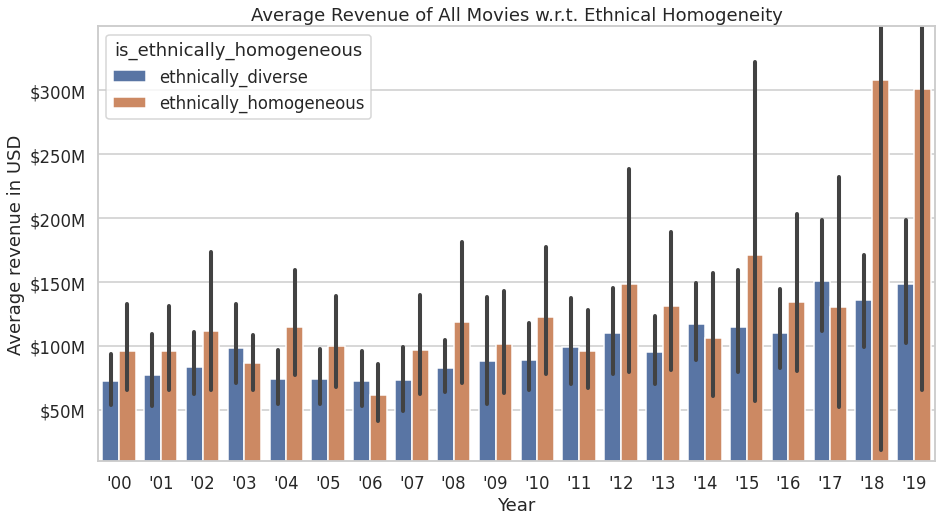

In [42]:
### Case 1: Gini impurity index Zero
years = np.arange(2000, 2020, 1)
year_labels = ["'" + str(y)[2:] for y in years]
year_labels_dict = dict(zip(years, year_labels))

top_5_genres = set(['Drama','Comedy','Action','Crime','Thriller'])


new_df = movies_gini_df.groupby(['startYear', 'is_ethnically_homogeneous']).agg(average_revenue=("revenue", 'mean'))
new_df = new_df.reset_index()

# plot barplot
# plt.figure(figsize=(25,10))
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_theme('talk')

sns.set_style('whitegrid')
colors = sns.color_palette("Set2",n_colors=3)

barplot = sns.barplot(data=movies_gini_df, x='startYear', y='revenue', hue='is_ethnically_homogeneous')
# barplot = sns.barplot(x="startYear",
#            y="average_revenue",
#            hue="is_ethnically_homogeneous",
#            data=new_df,
#             palette=colors,
#             errorbar=('ci', 95))

barplot.set(xlabel='Year', ylabel='Average revenue in USD')
barplot.set(title = 'Average Revenue of All Movies w.r.t. Ethnical Homogeneity')
barplot.set_yticklabels(["$0M","$50M","$100M","$150M","$200M","$250M",'$300M','$350M'])
barplot.set_yticks(range(0, 350000000,50000000))

barplot.set_ylim(10000000, 350000000)


barplot.set_xticklabels(year_labels)

# barplot.set_ylim(10000000, 350000000)
plt.show()




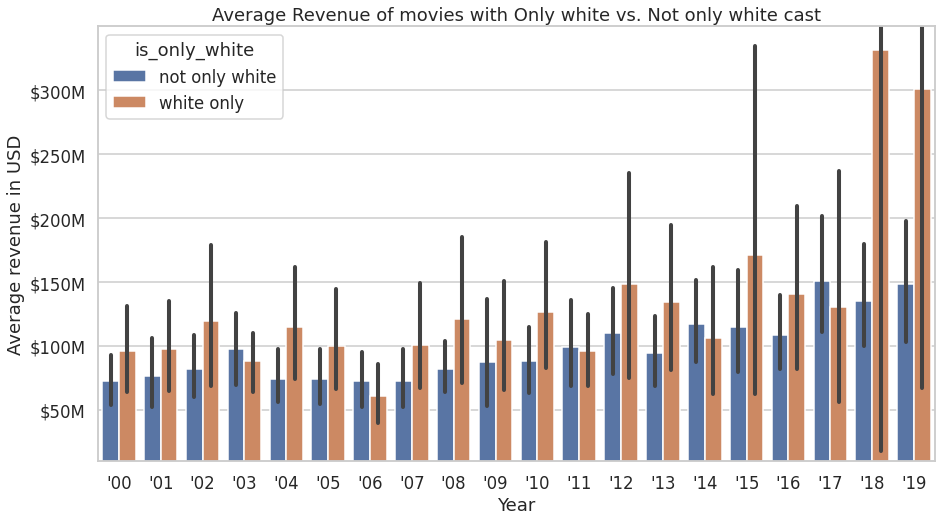

In [43]:
### Case 2: White only vs. Not only whites
years = np.arange(2000, 2020, 1)
year_labels = ["'" + str(y)[2:] for y in years]
year_labels_dict = dict(zip(years, year_labels))

top_5_genres = set(['Drama','Comedy','Action','Crime','Thriller'])


new_df = movies_gini_df.groupby(['startYear', 'is_only_white']).agg(average_revenue=("revenue", 'mean'))
new_df = new_df.reset_index()

# plot barplot
# plt.figure(figsize=(25,10))
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_theme('talk')

sns.set_style('whitegrid')
colors = sns.color_palette("Set2",n_colors=3)

barplot = sns.barplot(data=movies_gini_df, x='startYear', y='revenue', hue='is_only_white')
# barplot = sns.barplot(x="startYear",
#            y="average_revenue",
#            hue="is_only_white",
#            data=new_df,
#             palette=colors,
#             errorbar=('ci', 95))

barplot.set(xlabel='Year', ylabel='Average revenue in USD')
barplot.set(title = 'Average Revenue of movies with Only white vs. Not only white cast')
barplot.set_yticklabels(["$0M","$50M","$100M","$150M","$200M","$250M",'$300M','$350M'])
barplot.set_yticks(range(0, 350000000,50000000))

barplot.set_ylim(10000000, 350000000)


barplot.set_xticklabels(year_labels)

# barplot.set_ylim(10000000, 350000000)
plt.show()


